# Solution

### Imports

In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt
from solvers import solver
from tabulate import tabulate
from scipy.interpolate import interp1d


## Implementation

[*Write code to be able to run three methods you have chosen for arbitrary initial conditions ($x(t=0), y(t=0)$), time step ($\mathrm{d}t$), model parameters ($\alpha, \beta, \gamma, \delta$) and functions $f$ and $g$. [50 words]*]

### Model parameters

In [13]:
def rhs(t, u):
    alpha = 1
    beta = 1
    gamma = 1
    delta = 1
    f = lambda t: -np.sin(t) - np.cos(t)**2 - np.cos(t)
    g = lambda t: np.sin(t) + np.cos(t)**2 - np.cos(t)

    dx_dt = alpha * u[0] - beta * u[0] * u[1] + f(t)
    dy_dt = delta * u[0] * u[1] - gamma * u[1] + g(t)

    return np.array([dx_dt, dy_dt])

def rhs_B(t, u):
    alpha_B = 2/3
    beta_B = 4/3
    gamma_B = 1
    delta_B = 1
    f_B = lambda t: 0
    g_B = lambda t: 0

    dx_dt = alpha_B * u[0] - beta_B * u[0] * u[1] + f_B(t)
    dy_dt = delta_B * u[0] * u[1] - gamma_B * u[1] + g_B(t)

    return np.array([dx_dt, dy_dt])

### Implementing a new method

Most methods for solving systems of non-linear differential equations require not only an initial guess for $x$ and $y$, $x(t=0),  y(t=0)$, but also a second guess set for $x$ and $y$ after $dt$, $x(t=dt),  y(t=dt)$.


In [14]:

def secant_method(rhs, u0, t0, dt, T):
    return

### Running the methods with time steps and parameters

In [15]:
def run_simulation(u0, T, time_steps, methods, rhs_function):
    total_times = {method: [] for method in methods}
    line_positions = np.arange(len(time_steps))

    for dt_factor in time_steps:
        dt = T / dt_factor

        for method in methods:
            start_time = time.time()
            if method == "Secant":
                t, sol = secant_method(rhs_function, u0, 0, dt, T)
            else:
                t, sol = solver(rhs_function, u0, 0, dt, T, method)
            end_time = time.time()

            total_time = end_time - start_time
            total_times[method].append(total_time)

    return total_times

time_steps = [100, 200, 400, 800, 1600]
methods = ["Heun", "Runge-Kutta"]

# Test Case A
T_A = 2.5 * np.pi
u0_A = np.array([2.0, 0.0]) # x0 = 2, y0 = 0

# Run the simulation and get total times for Test Case A
total_times_A = run_simulation(u0_A, T_A, time_steps, methods, rhs)

# Test Case B parameters
T_B = 30
u0_B = np.array([0.9, 0.9])  # x0 = 0.9, y0 = 0.9

# Run the simulation and get total times for Test Case B
total_times_B = run_simulation(u0_B, T_B, time_steps, methods, rhs_B)


## Results

[*Simulate and show results for each of the test cases suggested by your boss for a range of time steps until a final time $T$.
For test case A, you should use $T = 2.5\pi$ and (at least) $\mathrm{d}t = T/100, T/200, T/400, T/800, T/1600$.
For test case B, you should use $T = 30$ and (at least) $\mathrm{d}t = T/100, T/200, T/400, T/800, T/1600$.
You should demonstrate how solutions look for each method, and the accuracy and efficiency of each approach. [50 words]*]



### Tables of values
*Warning - large datasets below*

Tables of each value of X at each multiple of dt for the solution, for each method and step size.

In [16]:
# Display results for Test Case A
for method in methods:
    print(f"\nResults for {method} (Test Case A):\n")
    headers_A = ['Time/2.5π  (s/2.5π)', '(x)', '(y)']

    for dt_factor, times in zip(time_steps, total_times_A[method]):
        print(f"dt = T/{dt_factor}, Total Time = {times:.6f} s")

        # Convert sol_ref to a NumPy array
        if method == "Secant":
            t_ref, sol_ref = secant_method(rhs, u0_A, 0, T_A / dt_factor, T_A)
        else:
            t_ref, sol_ref = solver(rhs, u0_A, 0, T_A / dt_factor, T_A, method)
        sol_ref = np.array(sol_ref)

        # Display results in a table for Test Case A
        formatted_t = ["({}/{})".format(int(ti / (T_A / dt_factor)), int(2.5 * np.pi / (T_A / dt_factor))) for ti in t_ref]
        table_data_A = list(zip(formatted_t, sol_ref[:, 0], sol_ref[:, 1]))

        # Print the table for Test Case A
        table_A = tabulate(table_data_A, headers=headers_A, tablefmt='pretty')
        print(table_A)
        print("\n" + "=" * 50 + "\n")  # Separate tables with a line

# Display results for Test Case B
for method in methods:
    print(f"\nResults for {method} (Test Case B):\n")
    headers_B = ['Time/30  (s/30)', '(x)', '(y)']  # Adjusted headers for Test Case B

    for count, (dt_factor, times) in enumerate(zip(time_steps, total_times_B[method])):
        print(f"dt = T/{dt_factor}, Total Time = {times:.6f} s")

        # Convert sol_ref to a NumPy array
        if method == "Secant":
            t_ref, sol_ref = secant_method(rhs_B, u0_B, 0, T_B / dt_factor, T_B)
        else:
            t_ref, sol_ref = solver(rhs_B, u0_B, 0, T_B / dt_factor, T_B, method)
        sol_ref = np.array(sol_ref)

        # Display results in a table for Test Case B
        formatted_t = ["({}/{})".format(i, dt_factor) for i in range(len(t_ref))]  # Adjusted formatting for Test Case B
        table_data_B = list(zip(formatted_t, sol_ref[:, 0], sol_ref[:, 1]))

        # Print the table for Test Case B
        table_B = tabulate(table_data_B, headers=headers_B, tablefmt='pretty')
        print(table_B)
        print("\n" + "=" * 50 + "\n")  # Separate tables with a line


Results for Heun (Test Case A):

dt = T/100, Total Time = 0.002188 s
+---------------------+-----------------------+----------------------+
| Time/2.5π  (s/2.5π) |          (x)          |         (y)          |
+---------------------+-----------------------+----------------------+
|       (0/100)       |          2.0          |         0.0          |
|       (1/100)       |  1.9972817134040186   | 0.002960398638418289 |
|       (2/100)       |  1.9884663615066651   | 0.01205708617534262  |
|       (3/100)       |   1.973611730705161   | 0.027235634129529087 |
|       (4/100)       |  1.9528118517131001   | 0.048405170731133026 |
|       (5/100)       |  1.9261960619843892   | 0.07543911444969265  |
|       (6/100)       |  1.8939278483542124   | 0.10817608868670181  |
|       (7/100)       |  1.8562035115123299   |  0.146420982710053   |
|       (8/100)       |   1.813250703032639   | 0.18994612050027881  |
|       (9/100)       |  1.7653268911594713   | 0.23849249993452085  |
|      

### Calculation Time

Charts to display the efficiency of each method based on how long execution takes.

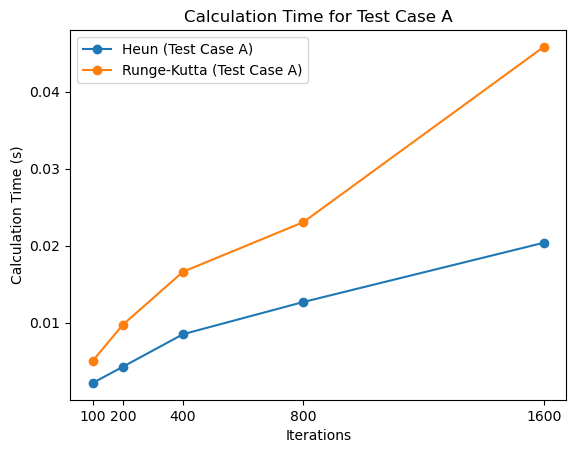

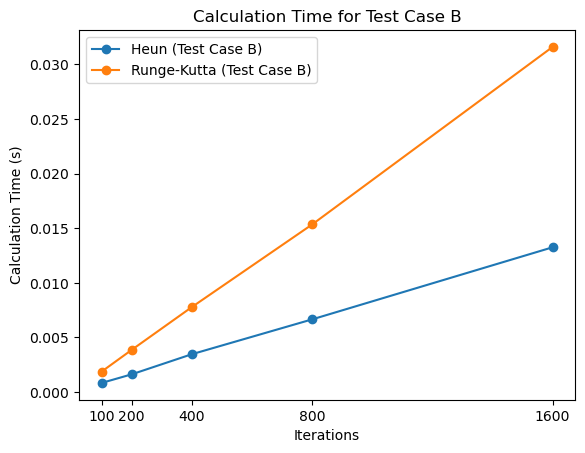

In [17]:
# Create line chart for total times for Test Case A
plt.figure()
for method in methods:
    plt.plot(time_steps, total_times_A[method], marker='o', label=f"{method} (Test Case A)")

plt.title("Calculation Time for Test Case A")
plt.xlabel("Iterations")
plt.ylabel("Calculation Time (s)")
plt.xticks(time_steps, [f'{dt_factor}' for dt_factor in time_steps])
plt.legend()
plt.show()

# Create line chart for total times for Test Case B
plt.figure()
for method in methods:
    plt.plot(time_steps, total_times_B[method], marker='o', label=f"{method} (Test Case B)")

plt.title("Calculation Time for Test Case B")
plt.xlabel("Iterations")
plt.ylabel("Calculation Time (s)")
plt.xticks(time_steps, [f'{dt_factor}' for dt_factor in time_steps])
plt.legend()
plt.show()


### Visualisations of the solutions
Solution tables for x and y at each point in time, using the smallest step size.

All methods are shown, although almost entirely overlap as difference in accuracy is negligible.

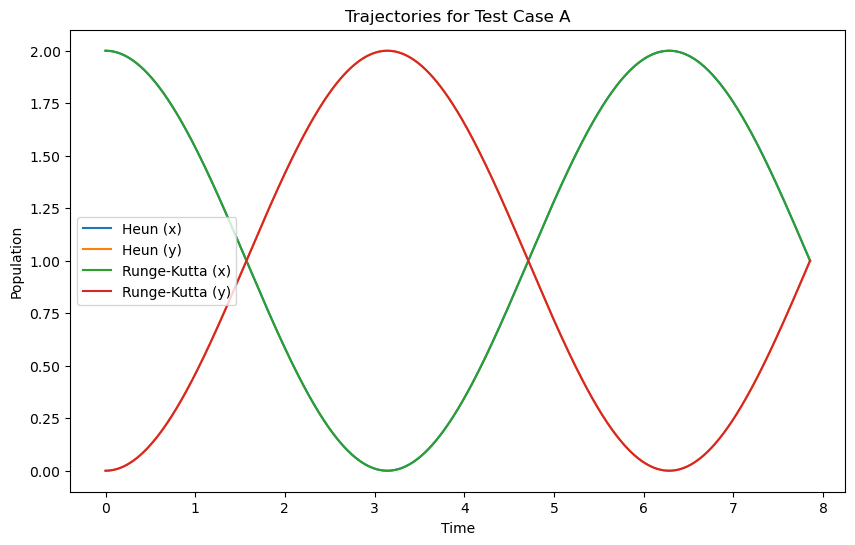

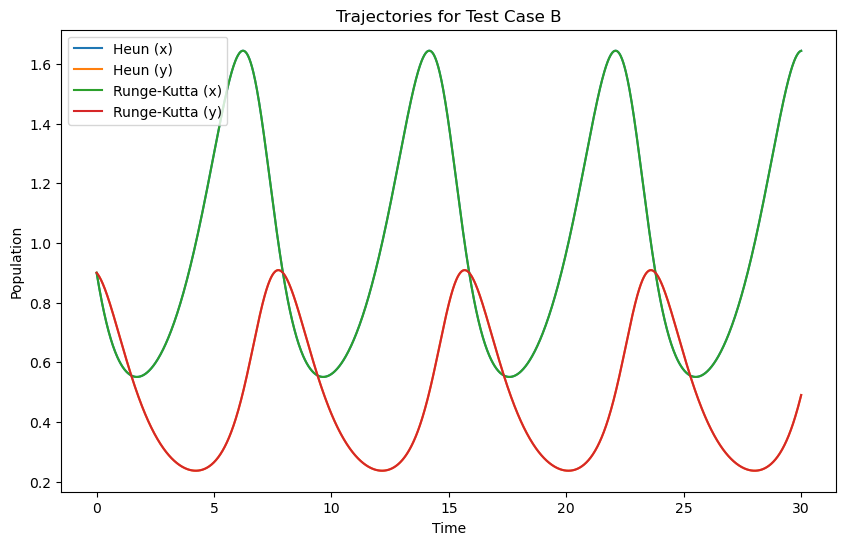

In [7]:
# Plotting trajectories for Test Case A
plt.figure(figsize=(10, 6))
for method in methods:
    if method == "Secant":
        t, sol = secant_method(rhs, u0_A, 0, T_A / 1600, T_A)
    else:
        t, sol = solver(rhs, u0_A, 0, T_A / 1600, T_A, method)
    sol = np.array(sol)
    plt.plot(t, sol[:, 0], label=f"{method} (x)")
    plt.plot(t, sol[:, 1], label=f"{method} (y)")

plt.title("Trajectories for Test Case A")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

# Plotting trajectories for Test Case B
plt.figure(figsize=(10, 6))
for method in methods:
    if method == "Secant":
        t, sol = secant_method(rhs_B, u0_B, 0, T_B / 1600, T_B)
    else:
        t, sol = solver(rhs_B, u0_B, 0, T_B / 1600, T_B, method)
    sol = np.array(sol)
    plt.plot(t, sol[:, 0], label=f"{method} (x)")
    plt.plot(t, sol[:, 1], label=f"{method} (y)")

plt.title("Trajectories for Test Case B")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

### Solution inaccuracy
We can compare test case A to its exact solution to find out the accuracy of each method.

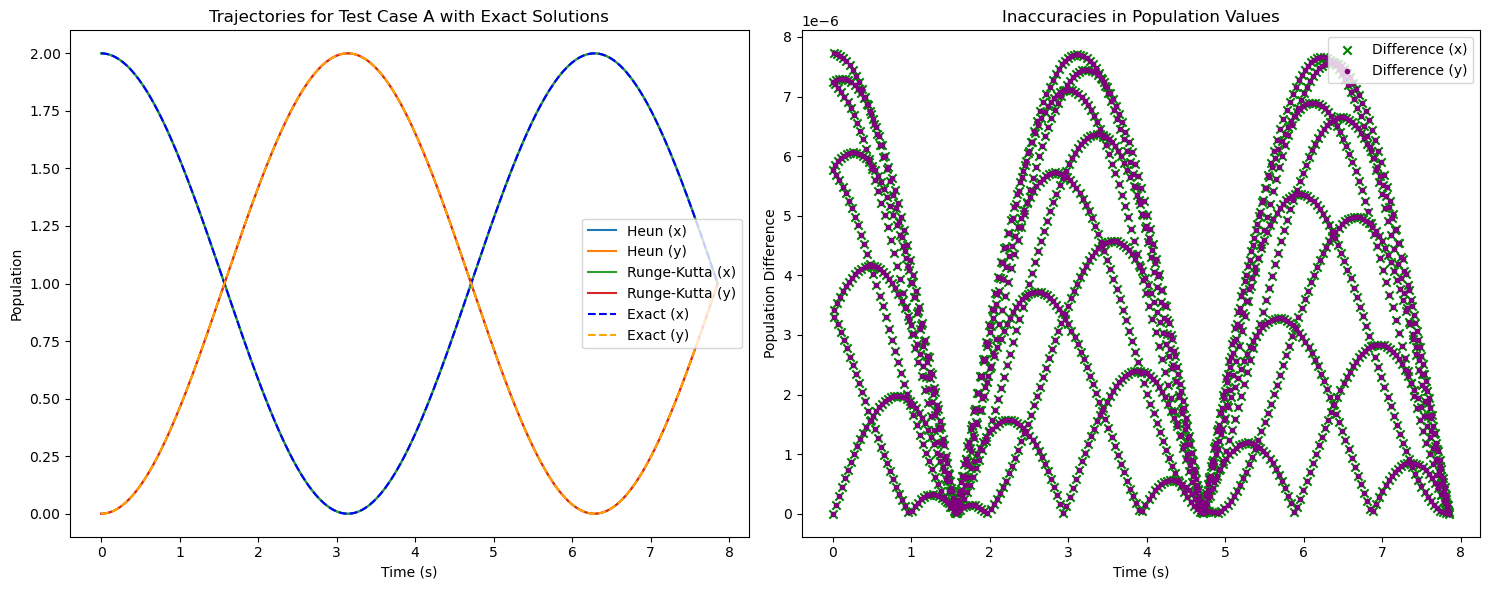

In [76]:
# Graphs for Test Case A with Exact Solutions and Differences
plt.figure(figsize=(15, 6))

# Create subplot for the graph of trajectories
plt.subplot(1, 2, 1)
for method in methods:
    t, sol = solver(rhs, u0_A, 0, T_A / 1600, T_A, method)
    sol = np.array(sol)
    plt.plot(t, sol[:, 0], label=f"{method} (x)")
    plt.plot(t, sol[:, 1], label=f"{method} (y)")

# Plotting the exact solutions for Test Case A with different colors
t_exact_A = np.linspace(0, T_A, num=1000)
x_exact_A = 1 + np.cos(t_exact_A)
y_exact_A = 1 - np.cos(t_exact_A)
plt.plot(t_exact_A, x_exact_A, label="Exact (x)", linestyle="--", color='blue')
plt.plot(t_exact_A, y_exact_A, label="Exact (y)", linestyle="--", color='orange')

plt.title("Trajectories for Test Case A with Exact Solutions")
plt.xlabel("Time (s)")
plt.ylabel("Population")
plt.legend()

# Create subplot for the differences in values
plt.subplot(1, 2, 2)

# Calculate differences between exact and method solutions for both x and y
diff_A_x = abs(exact_interp_x(t) - sol[:, 0])
diff_A_y = abs(exact_interp_y(t) - sol[:, 1])

# Plot the differences on the same graph
plt.scatter(t, diff_A_x, label="Difference (x)", marker='x', color='green')
plt.scatter(t, diff_A_y, label="Difference (y)", marker='.', color='purple')

plt.title("Inaccuracies in Population Values")
plt.xlabel("Time (s)")
plt.ylabel("Population Difference")
plt.legend()

plt.tight_layout()  # Adjust layout for better spacing

plt.show()


We can see that the inaccuracies of $x$ and $y$ are always the same. 

The (maximum) inaccuracy is proportional to the difference between $x$ and $y$ values in the solution. *Note that inaccuracy can be seen to fluctuate rapidly in the graph, as it is dependant on the relevance of machine epsilon in the solution calculation, which is changing with respect to the size of $f(t)$ and $g(t)$.*

## Analysis

[*Comment on the efficiency and accuracy of each approach. [250 words]*]

## Conclusion

[*Compare the methods that you have results for, and any other relevant methods from the module, and make a recommendation of which method you think is best. [300 words]*]